# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [4]:
data = pd.read_csv('advertising.csv')

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.sample(5)

,TV,Radio,Newspaper,Sales
32,97.2,1.5,30.0,13.2
90,134.3,4.9,9.3,14.0
110,225.8,8.2,56.5,18.4
147,243.2,49.0,44.3,25.4
30,292.9,28.3,43.2,21.4


In [7]:
data.shape

(200, 4)

# EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
# checking the null values.
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Basic Ploting

/Users/vivek/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


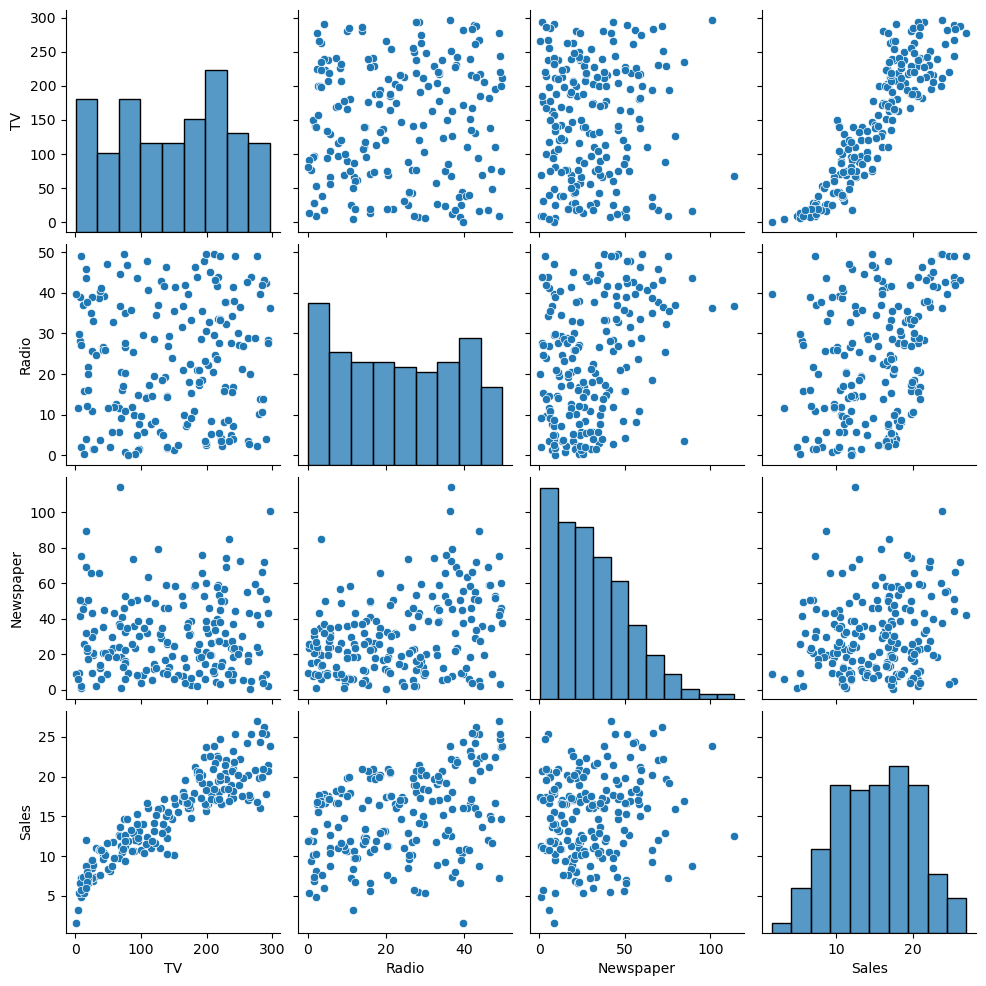

In [11]:
sns.pairplot(data=data)

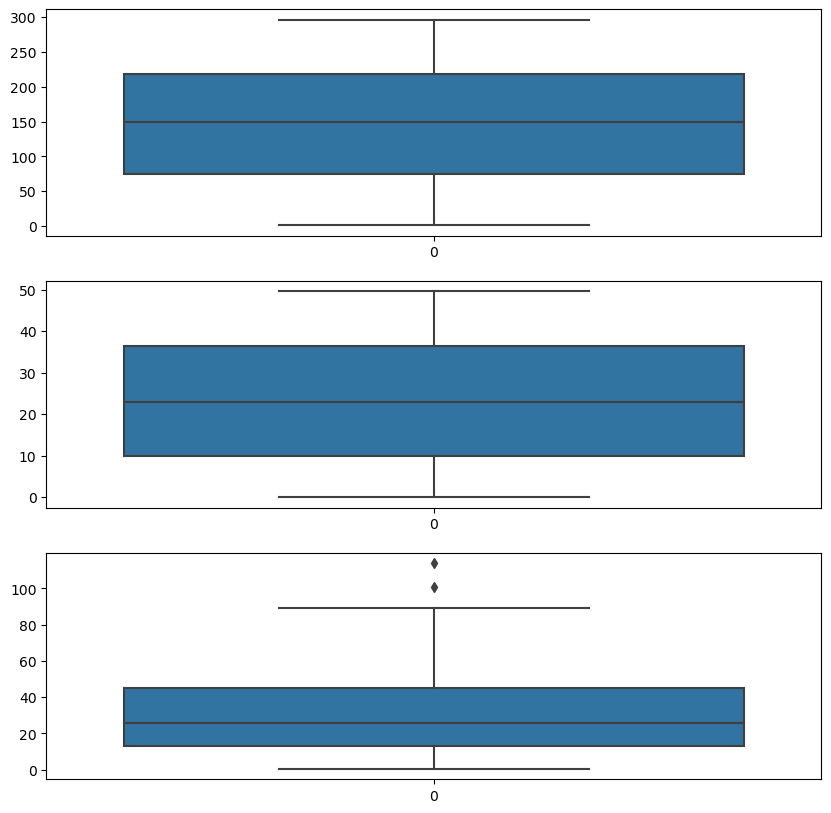

In [17]:
fig,axs = plt.subplots(3,figsize=(10,10))
plt1 = sns.boxplot(data['TV'],ax = axs[0])
plt2 = sns.boxplot(data['Radio'],ax = axs[1])
plt3 = sns.boxplot(data['Newspaper'],ax = axs[2])
plt.show()

/var/folders/7x/8bzxzk9n7_ngtqczs_tjhd280000gn/T/ipykernel_2426/1632056665.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

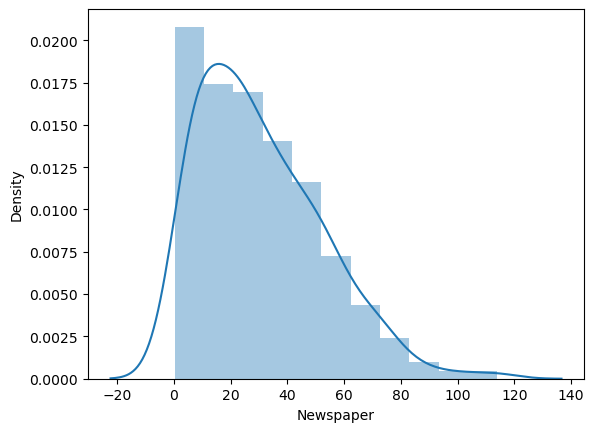

In [18]:
sns.distplot(data['Newspaper'])

# Removing the outliers from the 'Newspaper' column

In [22]:
data[data['Newspaper'] > data['Newspaper'].quantile(0.99)]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [25]:
# removing the outliers.
data = data.drop([16,101])

In [26]:
data.shape

(198, 4)

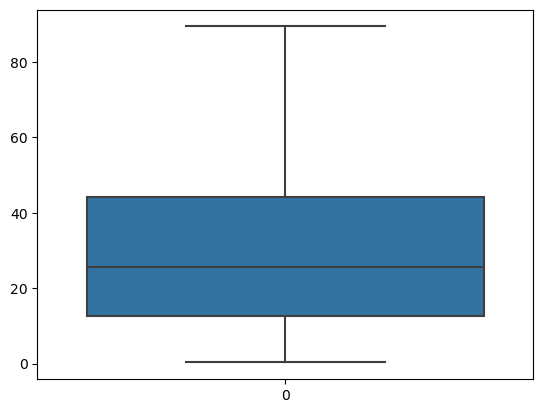

In [27]:
sns.boxplot(data['Newspaper'])
plt.show()

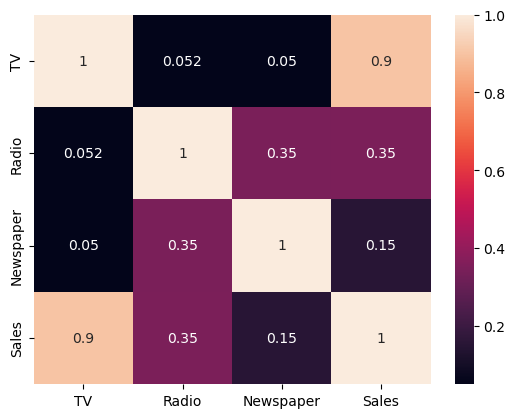

In [28]:
sns.heatmap(data.corr(), annot=True)
plt.show()

# Feature Selection

In [31]:
features = list(data.corr()['Sales'][(data.corr()['Sales'] >+ 0.3) | (data.corr()['Sales'] <- 0.3)].index)

In [32]:
features

['TV', 'Radio', 'Sales']

In [33]:
x = data[['TV','Radio']]
y = data['Sales']

# Model Selection

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [38]:
print(x_train.shape, y_train.shape)

(138, 2) (138,)


In [39]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [40]:
knn = KNeighborsRegressor()

knn.fit(x_train,y_train)

KNeighborsRegressor()

In [41]:
knn_train_pred = knn.predict(x_train)

In [42]:
knn_test_pred = knn.predict(x_test)

In [43]:
from sklearn.metrics import mean_squared_error
r2_score = r2_score(y_test,knn_test_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
print("R2_Score : ",r2_score)
print("Rmse : ",rmse)

R2_Score :  0.9272352203198202
Rmse :  1.4075463284264096


In [44]:
# SVR
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [46]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [50]:
from sklearn.metrics import mean_squared_error
r2_score = r2_score(y_test,svr_test_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
print("R2_Score : ",r2_score)
print("Rmse : ",rmse)

TypeError: 'numpy.float64' object is not callable